# Classificação com dados desbalanceados

## Carregamento da base de dados

In [1]:
#!pip install imbalanced-learn
#!conda install -c conda-forge imbalanced-learn

In [49]:
import pandas as pd
import random as rd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('CSVs/credit_data.csv')

df.shape

(2000, 5)

In [4]:
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [5]:
df.dropna(inplace=True)
df.shape

(1997, 5)

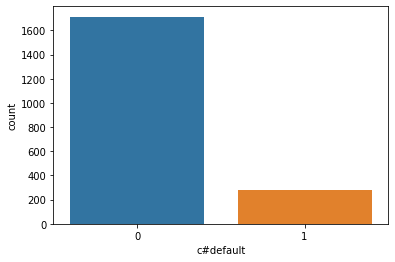

In [6]:
sns.countplot(df['c#default']);

In [7]:
X = df.iloc[:, 1:4].values

In [8]:
X.shape

(1997, 3)

In [9]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [10]:
y = df.iloc[:, 4].values
y.shape

(1997,)

In [11]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Base de treinamento e teste

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [13]:
X_train.shape, y_train.shape

((1597, 3), (1597,))

In [14]:
X_test.shape, y_test.shape

((400, 3), (400,))

In [15]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [16]:
1714 / len(df), 283 / len(df)

(0.8582874311467201, 0.14171256885327993)

In [17]:
np.unique(y_train, return_counts = True)

(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))

In [18]:
1371 / len(X_train), 226 / len(y_train)

(0.8584846587351284, 0.14151534126487164)

In [19]:
np.unique(y_test, return_counts = True)

(array([0, 1], dtype=int64), array([343,  57], dtype=int64))

In [20]:
343 / len(X_test), 57 / len(y_test)

(0.8575, 0.1425)

## Classificação com Naïve Bayes

In [21]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [22]:
pred = model.predict(X_test)
pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [23]:
y_test

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [24]:
accuracy_score(pred, y_test)

0.9175

In [25]:
cm = confusion_matrix(pred, y_test)
cm

array([[336,  26],
       [  7,  31]], dtype=int64)

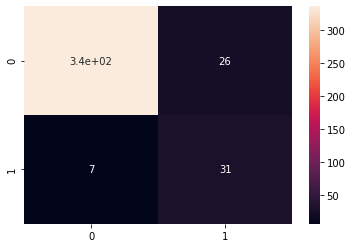

In [26]:
sns.heatmap(cm, annot=True);

In [27]:
# Acurácia total
(336 + 33) / (336 + 24 + 7 + 33)

0.9225

In [28]:
# Acurácia da classe '0', pagam o empréstimo
336 / (336 + 25)

0.9307479224376731

In [29]:
# Acurácia da classe '1', não pagam o empréstimo
33 / (7 + 33)

0.825

## Subamostragem (undersampling) - Tomek links

- https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html

In [31]:
tl = TomekLinks(sampling_strategy = 'majority')

In [35]:
X_under, y_under = tl.fit_resample(X, y)
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [37]:
id_under = tl.sample_indices_
len(id_under)

1897

In [38]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [39]:
np.unique(y_under, return_counts=True)

(array([0, 1], dtype=int64), array([1614,  283], dtype=int64))

In [41]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under, y_under,
                                                           test_size = 0.2, stratify = y_under)

X_train_u.shape, y_train_u.shape

((1517, 3), (1517,))

In [42]:
X_test_u.shape, y_test_u.shape

((380, 3), (380,))

In [43]:
model_u = GaussianNB()
model_u.fit(X_train_u, y_train_u)

GaussianNB()

In [44]:
pred_u = model_u.predict(X_test_u)
accuracy_score(pred_u, y_test_u)

0.9263157894736842

In [45]:
cm_u = confusion_matrix(pred_u, y_test_u)
cm_u

array([[317,  22],
       [  6,  35]], dtype=int64)

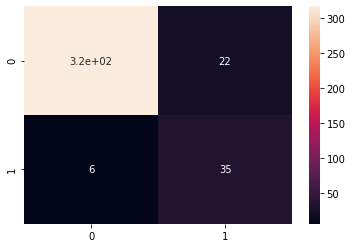

In [62]:
sns.heatmap(cm_u, annot=True);

In [47]:
# Acurácia da classe '0', pagam o empréstimo
317 / (317 + 22)

0.9351032448377581

In [48]:
# Acurácia da classe '1', não pagam o empréstimo
35 / (6 + 35)

0.8536585365853658

## Sobreamostragem

In [118]:
sm = SMOTE(sampling_strategy = 'minority', k_neighbors = 5)
X_over, y_over = sm.fit_resample(X, y)
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [119]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [120]:
np.unique(y_over, return_counts=True)

(array([0, 1], dtype=int64), array([1714, 1714], dtype=int64))

In [121]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over,
                                                           test_size=0.2, stratify=y_over)
X_train_o.shape, y_train_o.shape

((2742, 3), (2742,))

In [122]:
X_test_o.shape, y_test_o.shape

((686, 3), (686,))

In [123]:
model_o = GaussianNB()
model_o.fit(X_train_o, y_train_o)

GaussianNB()

In [124]:
pred_o = model_o.predict(X_test_o)
accuracy_score(pred_o, y_test_o)

0.9125364431486881

In [125]:
cm_o = confusion_matrix(pred_o, y_test_o)
cm_o

array([[300,  17],
       [ 43, 326]], dtype=int64)

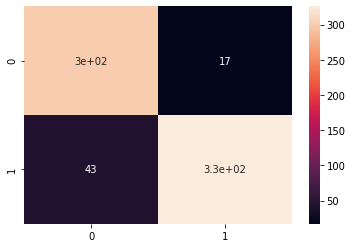

In [126]:
sns.heatmap(cm_o, annot=True);

In [127]:
# Acurácia da classe '0', pagam o empréstimo
298 / (298 + 7)

0.9770491803278688

In [128]:
# Acurácia da classe '1', não pagam o empréstimo
336 / (45 + 336)

0.8818897637795275